# Testing code during development 

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading data

In [2]:
from read_data import read_data

# reading voiholm rode data 
rides_raw_df = read_data('../input/voiholm.csv')

# reading weather data
weather_raw_df = read_data('../input/weather_data.csv')

INFO:root:Read dataframe from file path ../input/voiholm.csv
INFO:root:Read dataframe from file path ../input/weather_data.csv


In [3]:
from verify_data import verify_ride_df, verify_weather_df

# verifying the dataframes 
rides_df = verify_ride_df(rides_raw_df)
weather_df = verify_weather_df(weather_raw_df)

INFO:root:Validated Voiholm ride dataframe
INFO:root:Validated weather dataframe


### Preprocessing data

In [4]:
from preprocess_data import preprocessing
df = preprocessing(rides_df=rides_df, weather_df=weather_df)
df

,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday
0,891f2506107ffff,2020-08-01,0.0,2020-08-01,17.6,19.3,15.6,0.69,Saturday
1,891f2506107ffff,2020-08-02,0.0,2020-08-02,16.7,19.1,14.8,0.00,Sunday
2,891f2506107ffff,2020-08-03,1.0,2020-08-03,16.8,19.6,14.3,0.00,Monday
3,891f2506107ffff,2020-08-04,2.0,2020-08-04,15.0,17.1,12.8,11.44,Tuesday
4,891f2506107ffff,2020-08-05,2.0,2020-08-05,21.5,26.5,17.0,0.50,Wednesday
...,...,...,...,...,...,...,...,...,...
9775,891f25a9ecbffff,2020-08-26,0.0,2020-08-26,16.7,20.8,13.5,0.00,Wednesday
9776,891f25a9ecbffff,2020-08-27,0.0,2020-08-27,13.9,18.5,9.1,0.60,Thursday
9777,891f25a9ecbffff,2020-08-28,0.0,2020-08-28,14.5,17.8,12.1,0.10,Friday
9778,891f25a9ecbffff,2020-08-29,1.0,2020-08-29,14.7,19.8,8.9,0.00,Saturday


### Analyzing & Visulazing data

In [5]:
# Aggregating number of rides per day 
rides_per_day_df = df.groupby(['start_date',
                                'start_weekday',
                                'temperature',
                                'precipitation']).agg({'num_of_rides':'sum'}).reset_index()

rides_per_day_df.head(5)

,start_date,start_weekday,temperature,precipitation,num_of_rides
0,2020-08-01,Saturday,17.6,0.69,8689.0
1,2020-08-02,Sunday,16.7,0.00,3574.0
2,2020-08-03,Monday,16.8,0.00,4169.0
3,2020-08-04,Tuesday,15.0,11.44,4912.0
4,2020-08-05,Wednesday,21.5,0.50,2668.0


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


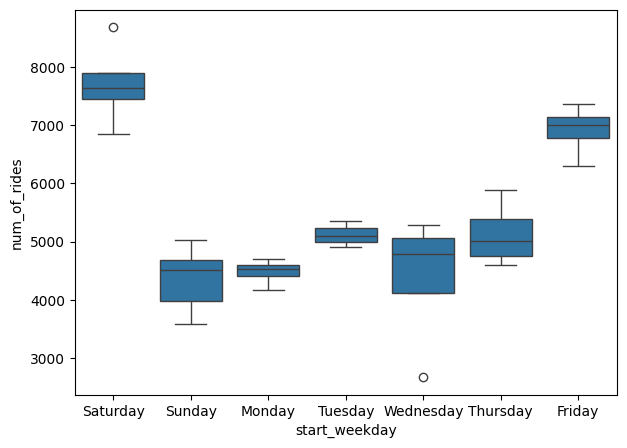

In [6]:
# Plotting boxplot for number of rides per weekday
plt.figure(figsize=[7,5])
sns.boxplot(x='start_weekday', y='num_of_rides', data=rides_per_day_df)
plt.show()

In [7]:
rides_per_day_df[['precipitation', 'temperature', 'num_of_rides']].corr()

,precipitation,temperature,num_of_rides
precipitation,1.000000,-0.260865,-0.081143
temperature,-0.260865,1.000000,0.016990
num_of_rides,-0.081143,0.016990,1.000000


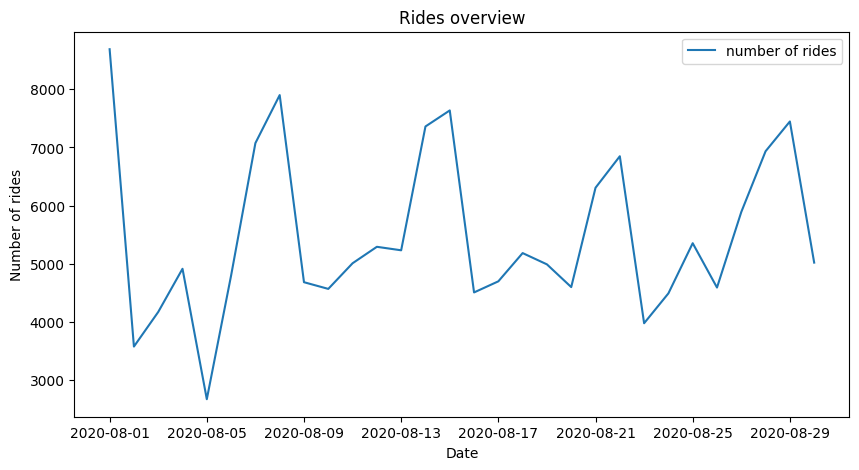

In [8]:
# Plotting rides 
plt.figure(figsize=(10,5))
plt.plot(rides_per_day_df.start_date, rides_per_day_df.num_of_rides, label='number of rides')

plt.title("Rides overview")
plt.xlabel("Date")
plt.ylabel("Number of rides")
plt.legend()
plt.show()

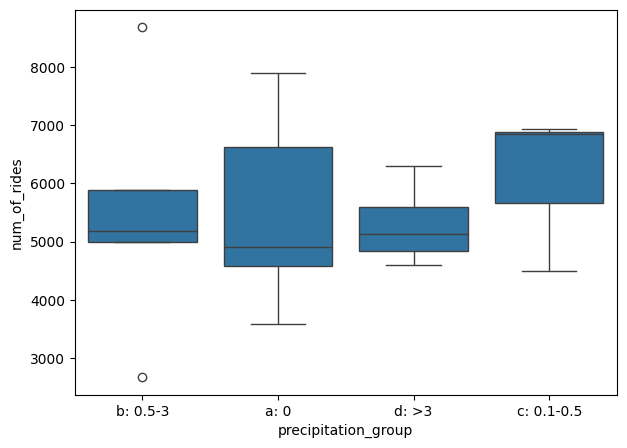

In [175]:
# Plotting boxplot for number of rides per weekday

rides_per_day_df['precipitation_group'] = rides_per_day_df.precipitation.map(lambda x: 'a: 0' if x==0 else (
    'c: 0.1-0.5' if x < 0.5 else (
    'b: 0.5-3' if x < 3 else (
        'd: >3'
    ))))

plt.figure(figsize=[7,5])
sns.boxplot(x='precipitation_group', y='num_of_rides', data=rides_per_day_df)
plt.show()

## Generating features

In [499]:
from generate_features import generate_features

df_with_added_features = generate_features(df)
df_with_added_features

,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday,avg_num_rides_in_area_one_week_before
0,891f2506107ffff,2020-08-01,0.0,2020-08-01,17.6,19.3,15.6,0.69,Saturday,NaN
1,891f2506107ffff,2020-08-02,0.0,2020-08-02,16.7,19.1,14.8,0.00,Sunday,NaN
2,891f2506107ffff,2020-08-03,1.0,2020-08-03,16.8,19.6,14.3,0.00,Monday,NaN
3,891f2506107ffff,2020-08-04,2.0,2020-08-04,15.0,17.1,12.8,11.44,Tuesday,NaN
4,891f2506107ffff,2020-08-05,2.0,2020-08-05,21.5,26.5,17.0,0.50,Wednesday,NaN
...,...,...,...,...,...,...,...,...,...,...
9775,891f25a9ecbffff,2020-08-26,0.0,2020-08-26,16.7,20.8,13.5,0.00,Wednesday,0.285714
9776,891f25a9ecbffff,2020-08-27,0.0,2020-08-27,13.9,18.5,9.1,0.60,Thursday,0.285714
9777,891f25a9ecbffff,2020-08-28,0.0,2020-08-28,14.5,17.8,12.1,0.10,Friday,0.285714
9778,891f25a9ecbffff,2020-08-29,1.0,2020-08-29,14.7,19.8,8.9,0.00,Saturday,0.142857


# Modelling

In [500]:
# Preparing data for modelling - not including NaNs
all_feature_df = df_with_added_features[df_with_added_features.avg_num_rides_in_area_one_week_before.notna()]
all_feature_df.set_index('date', inplace=True)
all_feature_df

,h3index_small,start_date,num_of_rides,temperature,max_temperature,min_temperature,precipitation,start_weekday,avg_num_rides_in_area_one_week_before
date,,,,,,,,,
2020-08-08,891f2506107ffff,2020-08-08,2.0,22.9,28.5,16.1,0.0,Saturday,1.000000
2020-08-09,891f2506107ffff,2020-08-09,1.0,21.7,28.0,14.2,0.0,Sunday,1.285714
2020-08-10,891f2506107ffff,2020-08-10,4.0,22.1,26.3,18.6,0.0,Monday,1.428571
2020-08-11,891f2506107ffff,2020-08-11,1.0,21.8,26.1,17.6,0.0,Tuesday,1.857143
2020-08-12,891f2506107ffff,2020-08-12,2.0,20.9,25.6,15.1,0.0,Wednesday,1.714286
...,...,...,...,...,...,...,...,...,...
2020-08-26,891f25a9ecbffff,2020-08-26,0.0,16.7,20.8,13.5,0.0,Wednesday,0.285714
2020-08-27,891f25a9ecbffff,2020-08-27,0.0,13.9,18.5,9.1,0.6,Thursday,0.285714
2020-08-28,891f25a9ecbffff,2020-08-28,0.0,14.5,17.8,12.1,0.1,Friday,0.285714


### XGboost

In [501]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [502]:
# Select features: 
col_list = ['num_of_rides', 'precipitation', 'start_weekday', 'max_temperature', 'avg_num_rides_in_area_one_week_before']

model_df = all_feature_df[col_list]

# Adding dummy variables for weekday
weekday_dummies_df = pd.get_dummies(all_feature_df.start_weekday)
model_df = pd.concat([model_df, weekday_dummies_df], axis=1)
model_df.drop(columns='start_weekday', inplace=True)

# Getting all feature names
predictors = list(model_df.columns)[1:]

model_df

,num_of_rides,precipitation,max_temperature,avg_num_rides_in_area_one_week_before,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,
2020-08-08,2.0,0.0,28.5,1.000000,False,False,True,False,False,False,False
2020-08-09,1.0,0.0,28.0,1.285714,False,False,False,True,False,False,False
2020-08-10,4.0,0.0,26.3,1.428571,False,True,False,False,False,False,False
2020-08-11,1.0,0.0,26.1,1.857143,False,False,False,False,False,True,False
2020-08-12,2.0,0.0,25.6,1.714286,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-26,0.0,0.0,20.8,0.285714,False,False,False,False,False,False,True
2020-08-27,0.0,0.6,18.5,0.285714,False,False,False,False,True,False,False
2020-08-28,0.0,0.1,17.8,0.285714,True,False,False,False,False,False,False


In [503]:
# Setting a side evaluation data to not be used when training and hyper parameter tuning the model
training_df, evaluation_df = train_test_split(model_df, test_size=0.15, random_state=43)
training_df

,num_of_rides,precipitation,max_temperature,avg_num_rides_in_area_one_week_before,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,
2020-08-22,0.0,0.20,20.5,2.285714,False,False,True,False,False,False,False
2020-08-30,0.0,0.00,19.0,0.142857,False,False,False,True,False,False,False
2020-08-22,8.0,0.20,20.5,6.428571,False,False,True,False,False,False,False
2020-08-19,16.0,1.19,24.3,14.428571,False,False,False,False,False,False,True
2020-08-16,4.0,0.00,30.6,9.000000,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-23,1.0,0.00,18.6,2.714286,False,False,False,True,False,False,False
2020-08-10,9.0,0.00,26.3,9.428571,False,True,False,False,False,False,False
2020-08-11,8.0,0.00,26.1,6.428571,False,False,False,False,False,True,False


In [504]:
# Hyper parameter tuning with cross validation 
X = training_df.drop(columns='num_of_rides')
y = training_df[['num_of_rides']]

max_depths = [2, 3, 4, 5, 6]
learning_rates = [0.01, 0.05, 0.10, 0.15]
n_estimators = [50, 100, 200, 300, 400]

result = []
for max_depth in max_depths: 
    for learning_rate in learning_rates:
        for n_estimator in n_estimators:
            # Defining the model
            xgb_model = xgb.XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimator, objective='reg:squarederror',  booster='gbtree')

            # define model evaluation method
            cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
            scores = cross_val_score(xgb_model, X, y, cv=cv, n_jobs=-1)
            mean_score = scores.mean()
            result.append([max_depth, learning_rate, n_estimator, mean_score])


hyper_parameter_result_df = pd.DataFrame(result, columns=['max_depth', 'learning_rate', 'n_estimator', 'mean_r2_score'])

# Extracting the best combination of hyper parameters and their values 
max_row = hyper_parameter_result_df.loc[hyper_parameter_result_df['mean_r2_score'].idxmax()]
best_depth = int(max_row['max_depth'])
best_learning_rate = float(max_row['learning_rate'])
best_n_estimators = int(max_row['n_estimator'])

In [505]:
# Fitting the model with the best hyper parameters
xgb_best_model = xgb.XGBRegressor(max_depth=best_depth,
                                    learning_rate=best_learning_rate,
                                    n_estimators=best_n_estimators,
                                    objective='reg:squarederror',
                                    booster='gbtree')

# Fitting the model on training data
model = xgb_best_model.fit(X, y)

In [508]:
# Evaluating final model on evaluation data
X_evaluation = evaluation_df.drop(columns='num_of_rides')

# using the trained model to predict values for test data
prediction = model.predict(X_evaluation)
y_true = evaluation_df[['num_of_rides']]

# Creating evaluation dataframe
test_evaulation_df = y_true.copy()
test_evaulation_df['prediction'] = prediction

# forcing negative predictions to be 0 
test_evaulation_df['prediction'] = test_evaulation_df.prediction.map(lambda x: 0 if x < 0 else x)
test_evaulation_df['prediction_int'] = round(test_evaulation_df.prediction, 0)

root_mse = mean_squared_error(test_evaulation_df.num_of_rides, test_evaulation_df.prediction_int, squared=False)
mae = mean_absolute_error(test_evaulation_df.num_of_rides, test_evaulation_df.prediction_int)
r2 = r2_score(test_evaulation_df.num_of_rides, test_evaulation_df.prediction_int)

print('root mse:', root_mse)
print('mae:', mae)
print('r2 score:', r2)

root mse: 7.886979424624135
mae: 4.174222222222222
r2 score: 0.921753207293072


<Axes: >

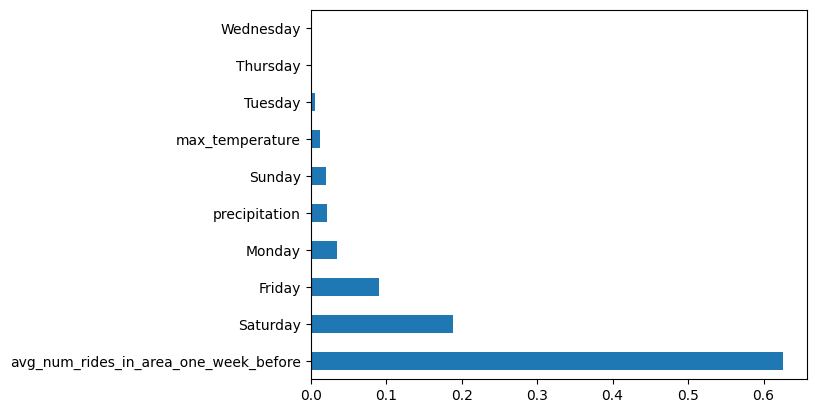

In [507]:
feature_importances = pd.Series(model.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Interference 

In [ ]:
# Settings:
date_of_prediction = '2020-09-01'


In [ ]:
# Get input data for 1 of sep 2020


In [ ]:
# Use model artifact to predict rides per h3index_small area

In [ ]:
# send predicted values to output


In [ ]:
# continuously evaluate predicted values vs actual outcome and alert when off more than 